In [2]:
import os
import glob
import yaml
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

cpal = sns.color_palette()
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.0, rc={'lines.linewidth':1.0, 'lines.markersize':7})
dpi = 300

%matplotlib inline

In [4]:
# month = 5
# day = 29
# search_path = f'/a2/uaren/travis/results_opt/2014/{month:02}/{day:02}/owp_*'
search_path = f'/a2/uaren/travis/results_opt/2014/*/*/owp_*'
opt_paths = glob.glob(search_path)
year = 2014

params = np.ones([len(opt_paths), 5])*np.nan
date_index = pd.Series(index=np.arange(len(opt_paths)))

for count, opt_path in enumerate(opt_paths):
    ymlpaths = glob.glob(os.path.join(opt_path, 'config_*'))
    rmse_paths = glob.glob(os.path.join(opt_path, 'rmse.h5'))
    if len(ymlpaths) != 1:
        print(os.path.split(opt_path)[-1])
        print('Number of configuration files: ', len(ymlpaths))
        continue
    else:
        ymlpath = ymlpaths[0]
    with open(ymlpath, 'r') as ymlfile:
        cfg = yaml.load(ymlfile)    
    date_index[count] = pd.datetime(year, cfg['date']['month'], cfg['date']['day'])
    params[count, 0] = cfg['wrf']['loc']
    params[count, 1] = cfg['wrf']['infl']
    params[count, 2] = cfg['opt_flow']['loc']
    params[count, 3] = cfg['opt_flow']['infl']
    
    if len(rmse_paths) != 1:
        print(os.path.split(opt_path)[-1])
        print('Number of rmse files: ', len(rmse_paths))
        continue
    else:
        rmse_path = rmse_paths[0]
    rmse_df = pd.read_hdf(rmse_path)
    params[count, 4] = np.nanmean(rmse_df[[15, 30, 45, 60]].values)

In [5]:
dates, counts = np.unique(list(zip(params[:, 0], params[:, 1])), axis=0, return_counts=True)
max_size = counts.max()

In [6]:
iterables = (
    [date_index.unique()] + [np.unique(p) for p in params[:, :-1].T])

In [7]:
M_index = pd.MultiIndex.from_product(iterables, names=['date', 'wrf_l', 'wrf_i', 'of_l', 'of_i'])
data_frame = pd.DataFrame(index=M_index, columns=['RMSE'])

In [8]:
for num in range(params.shape[0]):
    data_frame['RMSE'].loc[
        date_index[num],
        params[num, 0],
        params[num, 1],
        params[num, 2],
        params[num, 3]] = params[num, 4]

In [9]:
date = '2014-05-29'
reshaped = data_frame.loc[(date,slice(None), slice(None), slice(None), slice(None))].copy()

In [10]:
reshaped = reshaped.unstack(['of_l', 'of_i'])

In [11]:
print(reshaped)

                 RMSE                                                    \
of_l             4.0                 10.0                20.0             
of_i              1.5       2.0       1.5       2.0       1.5       2.0   
wrf_l wrf_i                                                               
1.0   1.5         NaN       NaN       NaN       NaN  0.158205  0.158624   
      4.0         NaN       NaN       NaN       NaN  0.157857  0.157276   
2.0   1.5    0.164471  0.165129  0.160564  0.162455  0.157606  0.157408   
      4.0    0.166168  0.165092  0.162326  0.161425  0.158059  0.157839   
4.0   1.5    0.166583  0.167848  0.164631  0.165096  0.161822  0.162043   
      4.0    0.167946  0.168441  0.164144  0.166007  0.161563  0.162694   
10.0  1.5    0.165426  0.167617  0.166132  0.165697  0.163411  0.162574   
      4.0    0.167163  0.169201  0.166575  0.165874  0.164973   0.16526   

                                                     
of_l             30.0                40.0    

In [12]:
%matplotlib inline

Text(0.5,1,'2014-05-29')

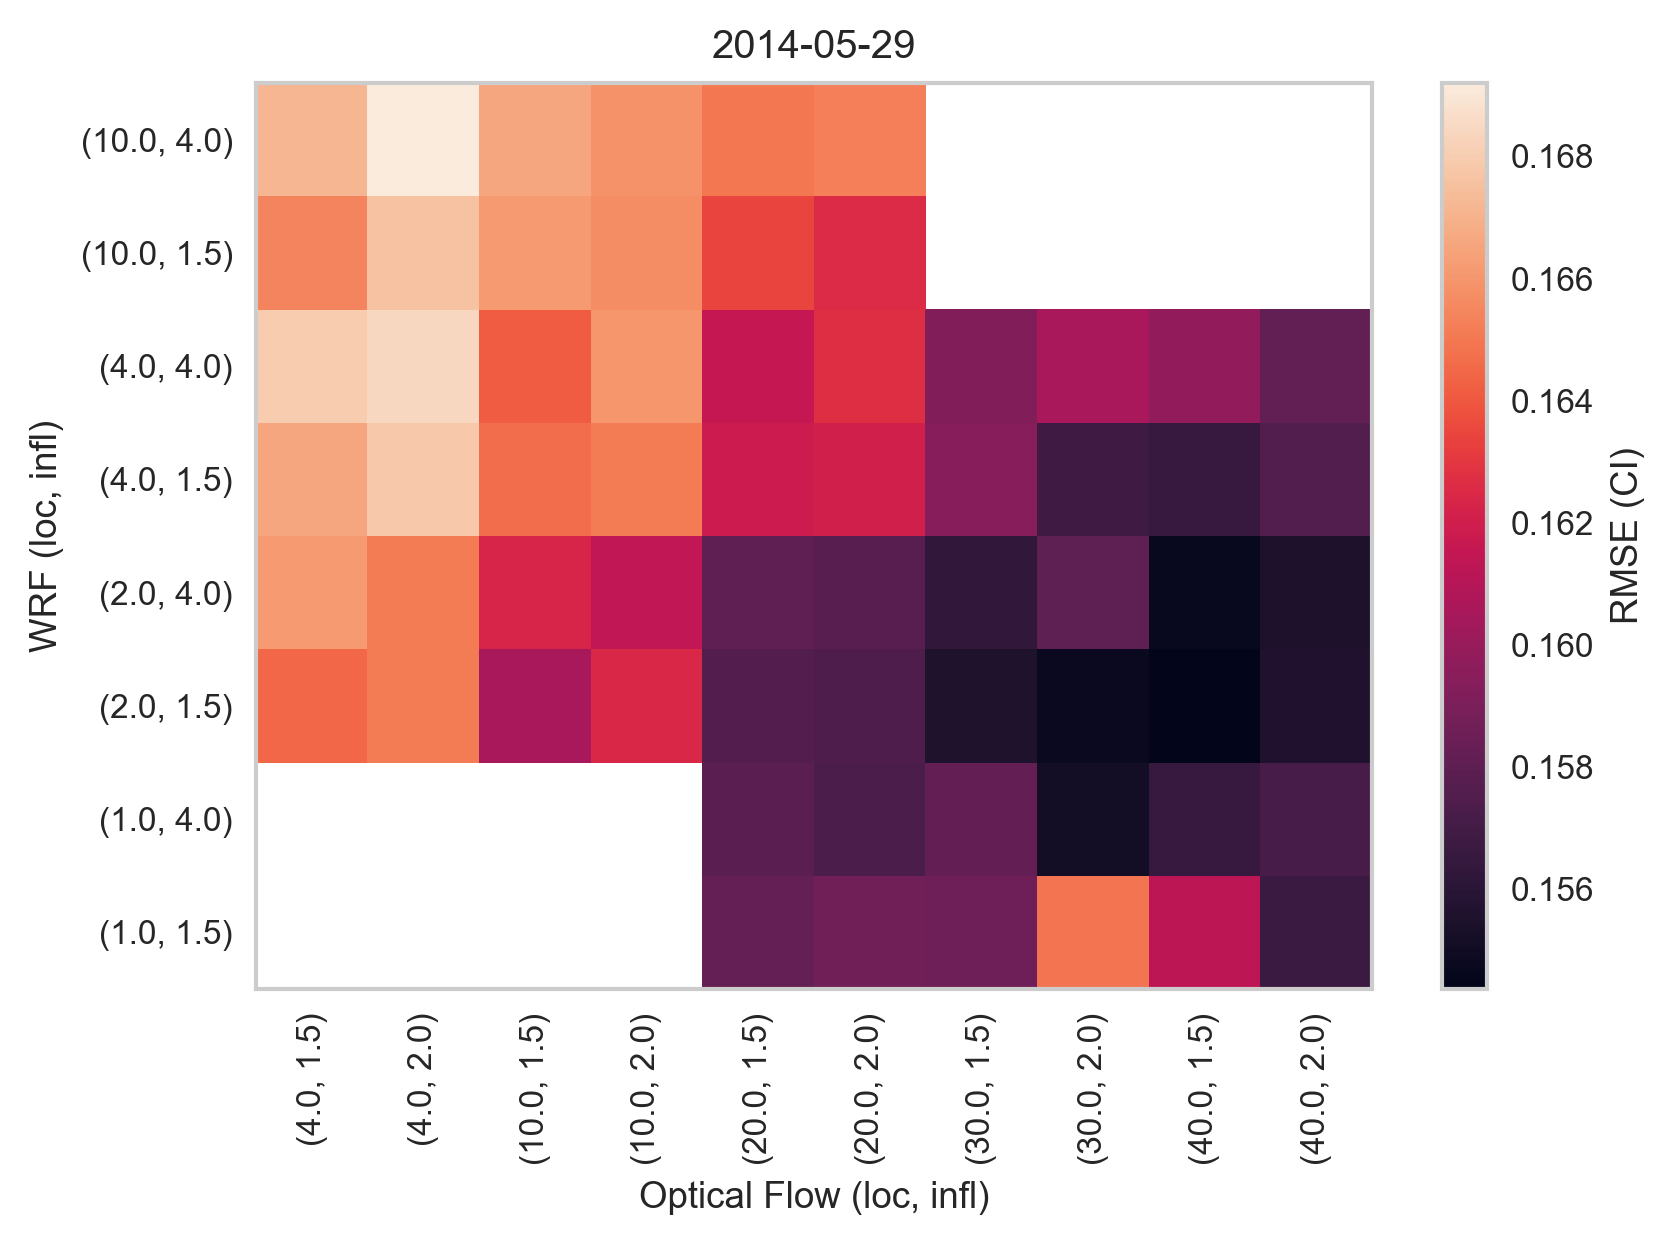

In [13]:
rmse = reshaped.values.astype('float')
rmse_norm = rmse/np.nanmax(rmse)

plt.figure(dpi=dpi)
im = plt.pcolormesh(rmse)
plt.colorbar(im, label='RMSE (CI)')
xticks = list(reshaped['RMSE'].columns)
plt.xticks(np.arange(len(xticks)) + 0.5,
           xticks, rotation=90)
plt.xlabel('Optical Flow (loc, infl)')
yticks = list(reshaped.index)
plt.yticks(np.arange(len(yticks)) + 0.5,
           yticks)
plt.ylabel('WRF (loc, infl)')
plt.title(date)

In [14]:
(np.nanmax(rmse) - np.nanmin(rmse))/np.nanmin(rmse)

0.096099502472228537

In [15]:
print(date,'\n', data_frame.loc[(date, slice(None), slice(None), slice(None), slice(None))].idxmin().item())

2014-05-29 
 (2.0, 1.5, 40.0, 1.5)


In [16]:
date = '2014-04-15'
reshaped = data_frame.loc[(date,slice(None), slice(None), slice(None), slice(None))].copy()

In [17]:
reshaped = reshaped.unstack(['of_l', 'of_i'])

In [18]:
print(reshaped)

                  RMSE                                                         \
of_l              4.0                   10.0                  20.0              
of_i               1.5        2.0        1.5        2.0        1.5        2.0   
wrf_l wrf_i                                                                     
1.0   1.5          NaN        NaN        NaN        NaN  0.0399165  0.0382986   
      4.0          NaN        NaN        NaN        NaN  0.0363039  0.0370517   
2.0   1.5     0.042045  0.0404237  0.0382439    0.04125  0.0398763  0.0398031   
      4.0    0.0458206  0.0438817   0.040933  0.0391412  0.0404688  0.0370414   
4.0   1.5     0.045915  0.0438494  0.0411818  0.0403951  0.0412782  0.0423136   
      4.0    0.0432258  0.0439827  0.0419378  0.0415959  0.0414664  0.0410066   
10.0  1.5    0.0421022  0.0420891  0.0405502  0.0414479  0.0420281  0.0396025   
      4.0    0.0412155  0.0410142  0.0415299  0.0445825  0.0420911  0.0435666   

                           

In [19]:
%matplotlib inline

Text(0.5,1,'2014-04-15')

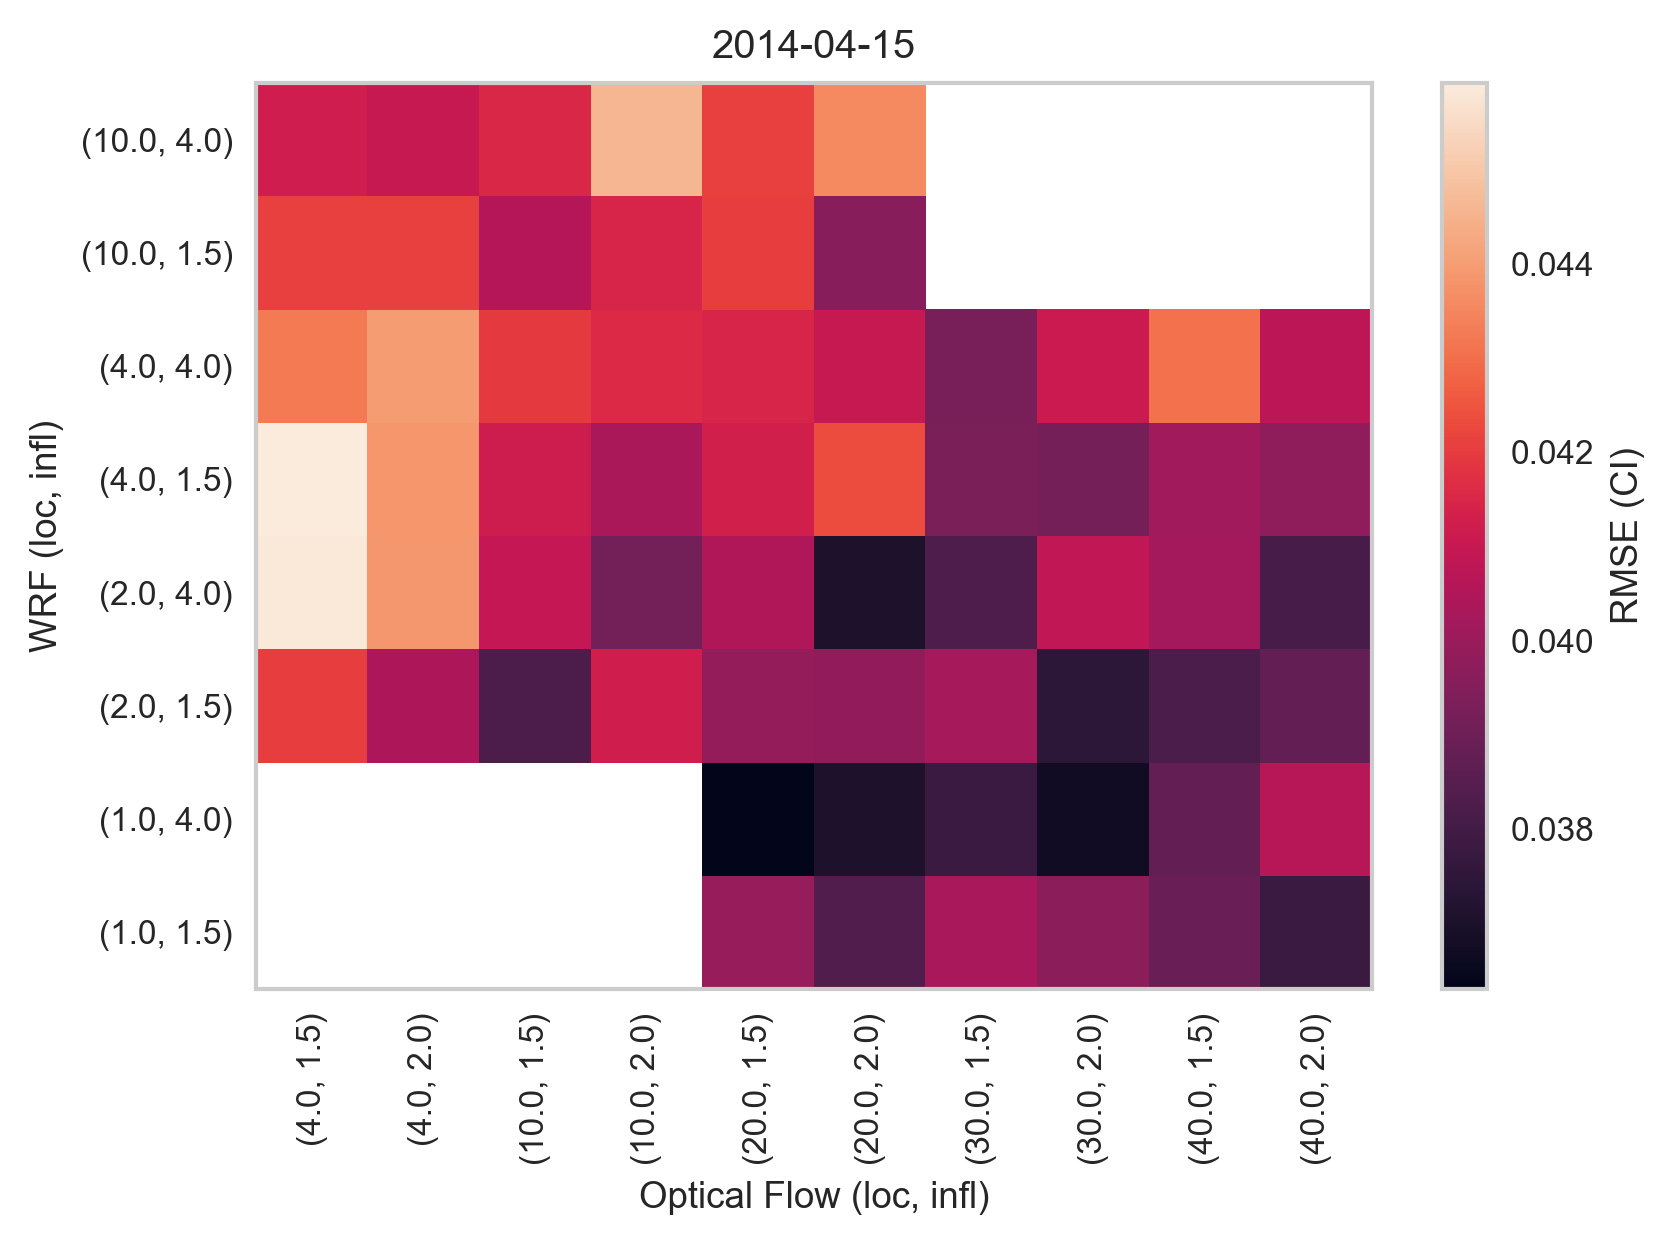

In [20]:
rmse = reshaped.values.astype('float')
rmse_norm = rmse/np.nanmax(rmse)

plt.figure(dpi=dpi)
im = plt.pcolormesh(rmse)
plt.colorbar(im, label='RMSE (CI)')
xticks = list(reshaped['RMSE'].columns)
plt.xticks(np.arange(len(xticks)) + 0.5,
           xticks, rotation=90)
plt.xlabel('Optical Flow (loc, infl)')
yticks = list(reshaped.index)
plt.yticks(np.arange(len(yticks)) + 0.5,
           yticks)
plt.ylabel('WRF (loc, infl)')
plt.title(date)

In [21]:
print(date,'\n', data_frame.loc[(date, slice(None), slice(None), slice(None), slice(None))].idxmin().item())

2014-04-15 
 (1.0, 4.0, 20.0, 1.5)


In [22]:
date = '2014-06-11'
reshaped = data_frame.loc[(date,slice(None), slice(None), slice(None), slice(None))].copy()

In [23]:
reshaped = reshaped.unstack(['of_l', 'of_i'])

In [24]:
print(reshaped)

            RMSE                                                         \
of_l        4.0       10.0           20.0                30.0             
of_i         1.5  2.0  1.5  2.0       1.5       2.0       1.5       2.0   
wrf_l wrf_i                                                               
1.0   1.5    NaN  NaN  NaN  NaN  0.172103   0.16755  0.171767   0.16941   
      4.0    NaN  NaN  NaN  NaN  0.172737   0.17039  0.169233   0.17106   
2.0   1.5    NaN  NaN  NaN  NaN  0.173786  0.177368  0.172441  0.171351   
      4.0    NaN  NaN  NaN  NaN  0.171119  0.173869   0.17058  0.169534   
4.0   1.5    NaN  NaN  NaN  NaN   0.17525   0.17331  0.174631  0.174603   
      4.0    NaN  NaN  NaN  NaN   0.17438  0.174432  0.174705  0.175497   
10.0  1.5    NaN  NaN  NaN  NaN       NaN       NaN       NaN       NaN   
      4.0    NaN  NaN  NaN  NaN       NaN       NaN       NaN       NaN   

                                 
of_l             40.0            
of_i              1.5       2.0

In [25]:
%matplotlib inline

Text(0.5,1,'2014-06-11')

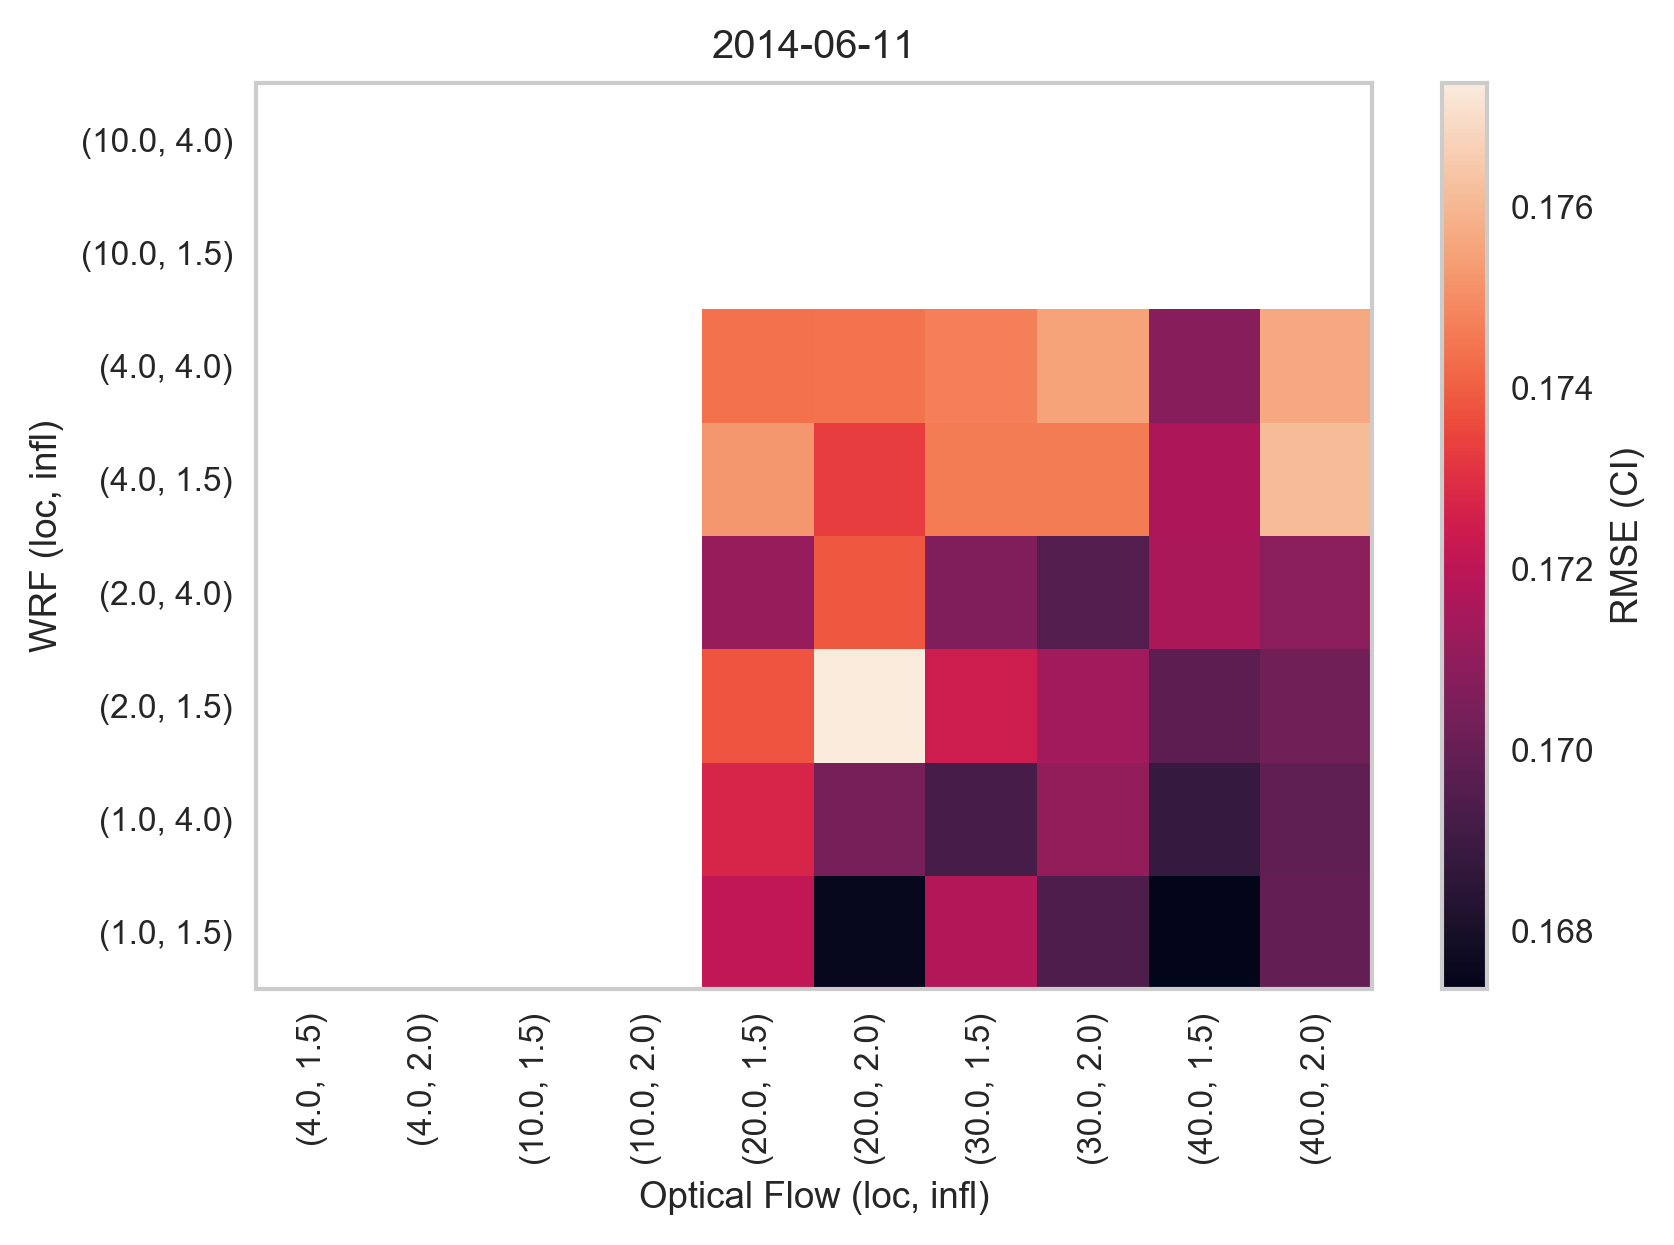

In [26]:
rmse = reshaped.values.astype('float')
rmse_norm = rmse/np.nanmax(rmse)

plt.figure(dpi=dpi)
im = plt.pcolormesh(rmse)
plt.colorbar(im, label='RMSE (CI)')
xticks = list(reshaped['RMSE'].columns)
plt.xticks(np.arange(len(xticks)) + 0.5,
           xticks, rotation=90)
plt.xlabel('Optical Flow (loc, infl)')
yticks = list(reshaped.index)
plt.yticks(np.arange(len(yticks)) + 0.5,
           yticks)
plt.ylabel('WRF (loc, infl)')
plt.title(date)

In [27]:
print(date,'\n', data_frame.loc[(date, slice(None), slice(None), slice(None), slice(None))].idxmin().item())

2014-06-11 
 (1.0, 1.5, 40.0, 1.5)


In [28]:
averaged = data_frame.unstack('date')
averaged = averaged.mean(axis=1, skipna=False)
reshaped = averaged.unstack(['of_l', 'of_i'])

In [29]:
%matplotlib inline

Text(0.5,1,'Average of all')

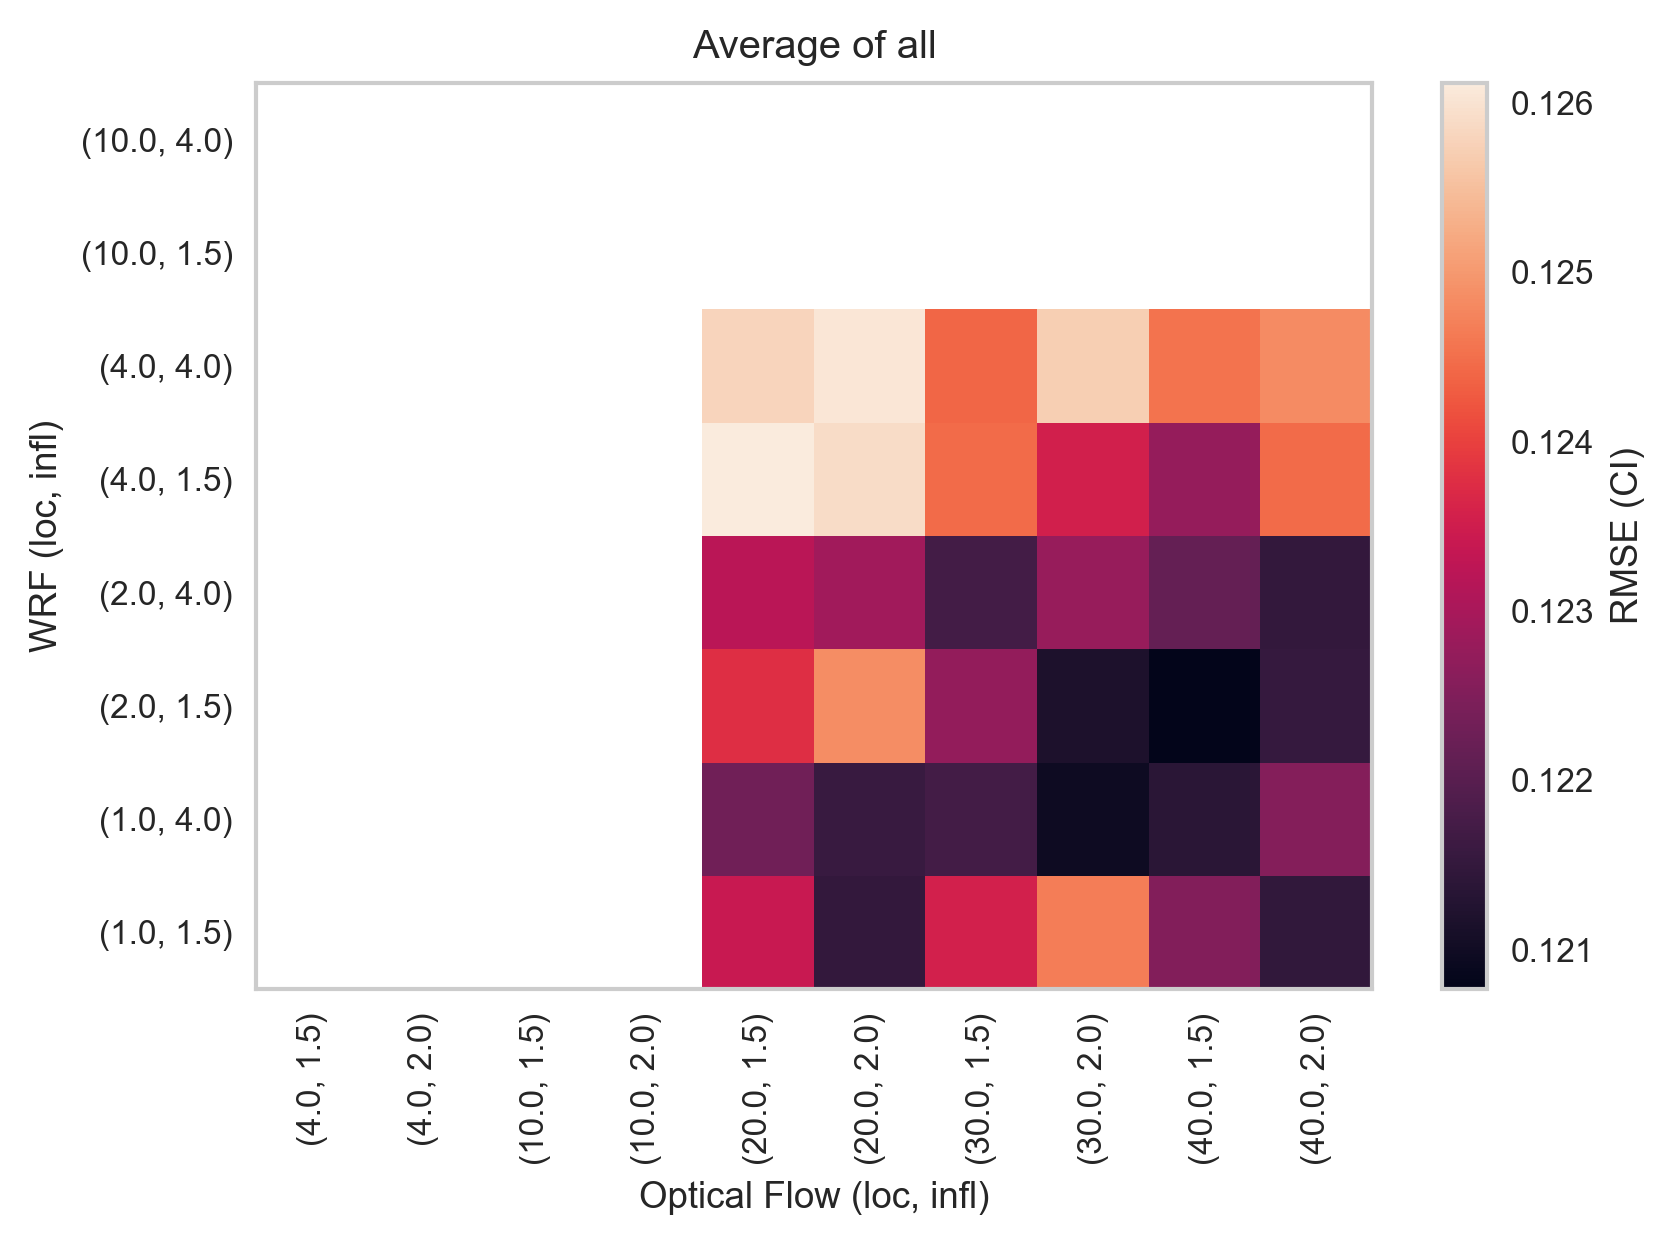

In [30]:
rmse = reshaped.values.astype('float')
rmse_norm = rmse/np.nanmax(rmse)

plt.figure(dpi=dpi)
im = plt.pcolormesh(rmse)
plt.colorbar(im, label='RMSE (CI)')
xticks = list(reshaped.columns)
plt.xticks(np.arange(len(xticks)) + 0.5,
           xticks, rotation=90)
plt.xlabel('Optical Flow (loc, infl)')
yticks = list(reshaped.index)
plt.yticks(np.arange(len(yticks)) + 0.5,
           yticks)
plt.ylabel('WRF (loc, infl)')
plt.title('Average of all')

In [31]:
print(date,'\n', averaged.idxmin())

2014-06-11 
 (2.0, 1.5, 40.0, 1.5)


In [64]:
# month = 5
# day = 29
# search_path = f'/a2/uaren/travis/results_opt/2014/{month:02}/{day:02}/owp_*'
search_path = f'/a2/uaren/travis/results_opt/2014/*/*/ow_*'
opt_paths = glob.glob(search_path)
year = 2014

params = np.ones([len(opt_paths), 5])*np.nan
date_index = pd.Series(index=np.arange(len(opt_paths)))

for count, opt_path in enumerate(opt_paths):
    ymlpaths = glob.glob(os.path.join(opt_path, 'config_*'))
    rmse_paths = glob.glob(os.path.join(opt_path, 'rmse.h5'))
    if len(ymlpaths) != 1:
        print(os.path.split(opt_path)[-1])
        print('Number of configuration files: ', len(ymlpaths))
        continue
    else:
        ymlpath = ymlpaths[0]
    with open(ymlpath, 'r') as ymlfile:
        cfg = yaml.load(ymlfile)    
    date_index[count] = pd.datetime(year, cfg['date']['month'], cfg['date']['day'])
    params[count, 0] = cfg['wrf']['loc']
    params[count, 1] = cfg['wrf']['infl']
    params[count, 2] = cfg['opt_flow']['loc']
    params[count, 3] = cfg['opt_flow']['infl']
    
    if len(rmse_paths) != 1:
        print(os.path.split(opt_path)[-1])
        print('Number of rmse files: ', len(rmse_paths))
        continue
    else:
        rmse_path = rmse_paths[0]
    rmse_df = pd.read_hdf(rmse_path)
    params[count, 4] = np.nanmean(rmse_df[[15, 30, 45, 60]].values)

In [65]:
dates, counts = np.unique(list(zip(params[:, 0], params[:, 1])), axis=0, return_counts=True)
max_size = counts.max()

In [66]:
iterables = (
    [date_index.unique()] + [np.unique(p) for p in params[:, :-1].T])

In [67]:
M_index = pd.MultiIndex.from_product(iterables, names=['date', 'wrf_l', 'wrf_i', 'of_l', 'of_i'])
data_frame = pd.DataFrame(index=M_index, columns=['RMSE'])

In [68]:
for num in range(params.shape[0]):
    data_frame['RMSE'].loc[
        date_index[num],
        params[num, 0],
        params[num, 1],
        params[num, 2],
        params[num, 3]] = params[num, 4]

In [69]:
date = '2014-05-29'
reshaped = data_frame.loc[(date,slice(None), slice(None), slice(None), slice(None))].copy()

In [70]:
reshaped = reshaped.unstack(['of_l', 'of_i'])

In [71]:
print(reshaped)

                 RMSE                              
of_l             4.0                 20.0          
of_i              1.5       2.0       1.5       2.0
wrf_l wrf_i                                        
4.0   1.5    0.179225  0.179909  0.174149  0.176678
      4.0    0.175384  0.175807  0.171094    0.1712
10.0  1.5    0.180777  0.180783  0.180545  0.180297
      4.0    0.178222  0.178315  0.176442   0.17634


In [72]:
%matplotlib inline

Text(0.5,1,'2014-05-29')

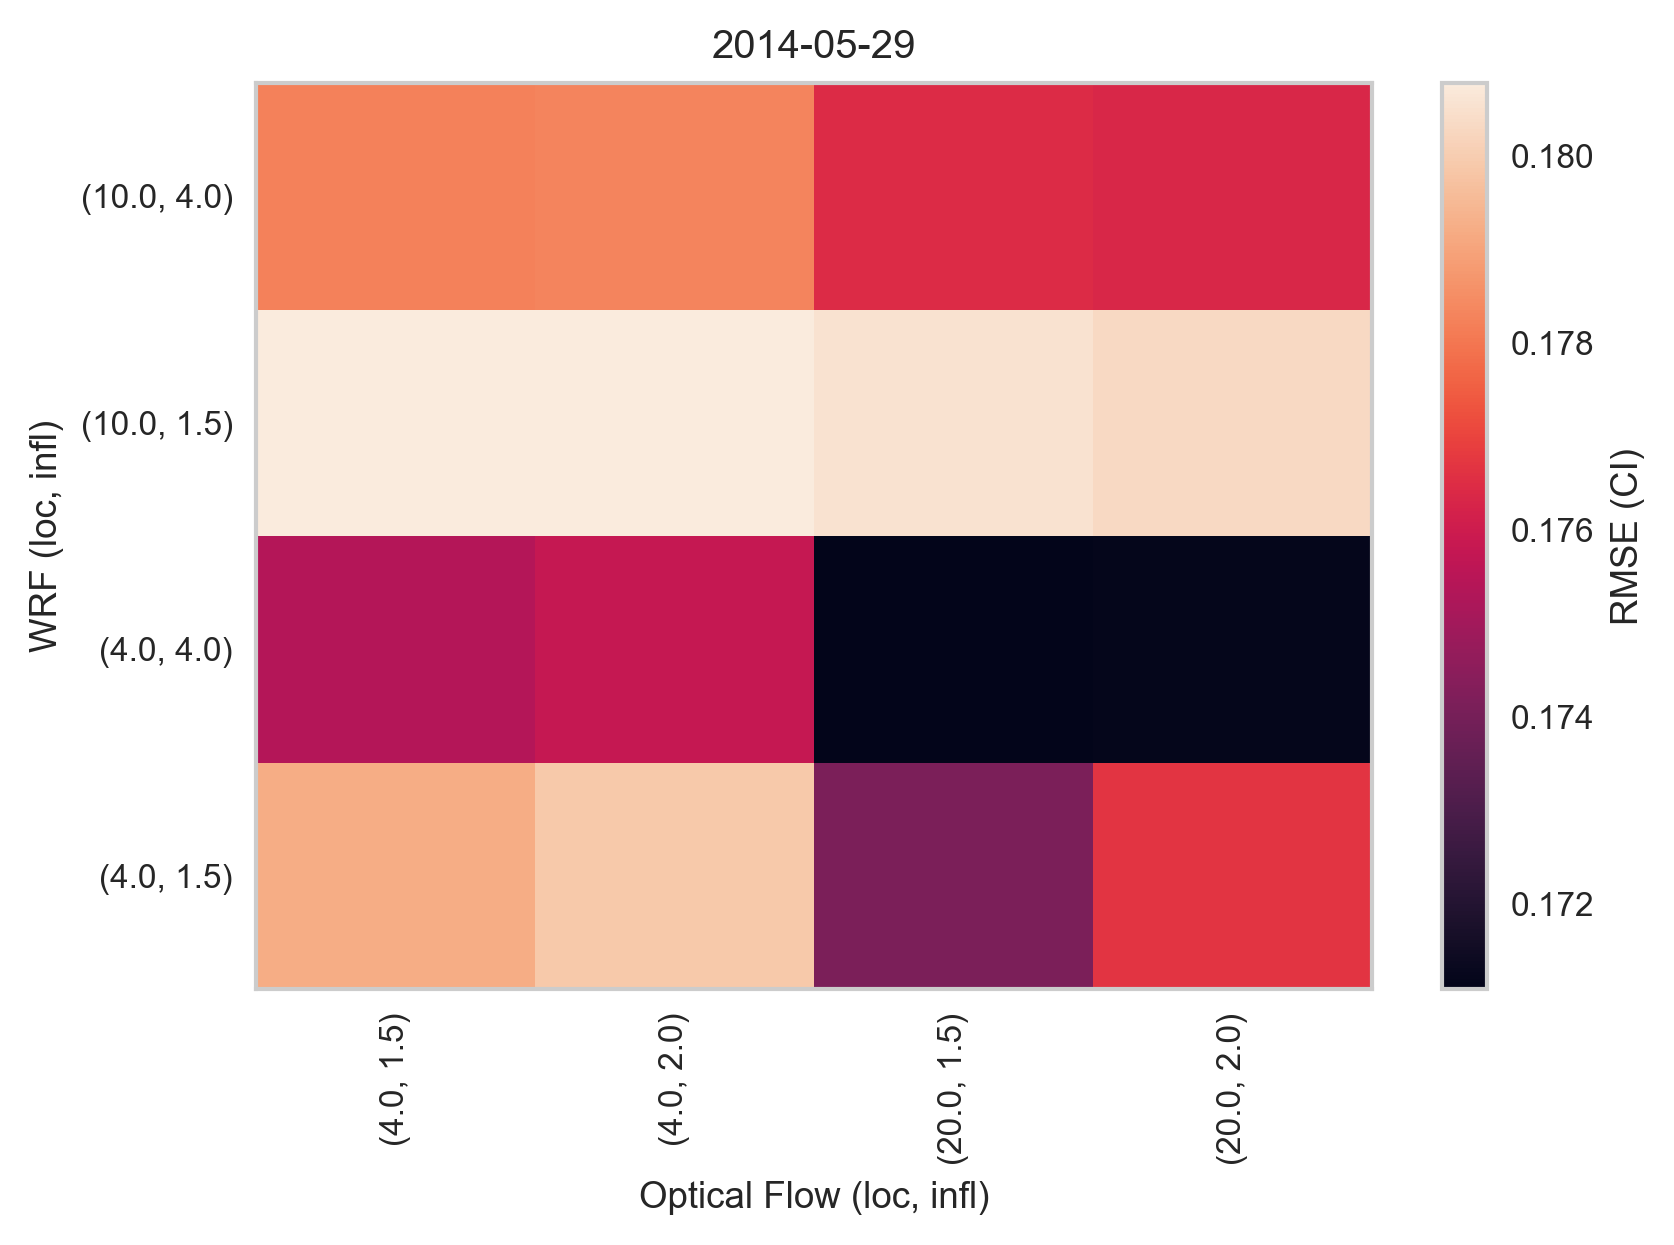

In [73]:
rmse = reshaped.values.astype('float')
rmse_norm = rmse/np.nanmax(rmse)

plt.figure(dpi=dpi)
im = plt.pcolormesh(rmse)
plt.colorbar(im, label='RMSE (CI)')
xticks = list(reshaped['RMSE'].columns)
plt.xticks(np.arange(len(xticks)) + 0.5,
           xticks, rotation=90)
plt.xlabel('Optical Flow (loc, infl)')
yticks = list(reshaped.index)
plt.yticks(np.arange(len(yticks)) + 0.5,
           yticks)
plt.ylabel('WRF (loc, infl)')
plt.title(date)